In [1]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [2]:
import json
import pandas
from collections import Counter
from matplotlib_venn import venn3
import os
import pandas as pd

In [3]:
def OpenAndCollect(f):
    json_data = open("SampleSet/"+f+"/"+f+".json")
    j = json.load(json_data)
    json_data.close()
    totalTags = []
    for i in range(len(j)):
        if 'tags' not in j[i].keys(): continue
        totalTags+=[b.lower() for b in j[i]['tags'] if b.lower() != f.lower() and b.lower() not in places and b.lower() not in others]# or b.lower not in places or b.lower not in others)]
    return totalTags


In [4]:
def PandasAndClean(tags):
    wordCount = Counter(tags)
    df = pandas.DataFrame.from_dict(wordCount, orient='index')
    df = df[df>10]
    df= df.dropna()
    df = df.head(30)
    df = df.sort_values([0], ascending=False)
    return df

In [32]:
def tfidf(studioTags, mincutoff): #studioTags dict of studio: [hashtags]
    studioNames = studioTags.keys()
    numStudios = len(studioNames)
    words = dict(Counter([tag for tags in studioTags.values() for tag in tags])).keys()
    totWordCount = len(words)
    #TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)
    #IDF(t) = log_e(Total number of documents / Number of documents with term t in it).
    df = pd.DataFrame(index=words, columns=studioNames)
    df = df.fillna(0)
    #min_df = df < 0.2 ignore
    for studio in studioNames:
        wordCount = dict(Counter(studioTags[studio]))
        tf = {k: v/len(wordCount.keys()) for k, v in wordCount.items()} 
        for term in tf.keys():
            idf = np.log(numStudios/sum([1 for x in studioTags.values() if term in x]))
            if idf < mincutoff: continue
            df.loc[term, studio] = tf[term]*idf
    return df

def tfidf_quick(studioTags, mincutoff): #studioTags dict of studio: [hashtags]
    studioNames = studioTags.keys()
    numStudios = len(studioNames)
    words = dict(Counter([tag for tags in studioTags.values() for tag in tags])).keys()
    totWordCount = len(words)
    #TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)
    #IDF(t) = log_e(Total number of documents / Number of documents with term t in it).
    df = pd.DataFrame(index=words, columns=studioNames)
    df = df.fillna(0)
    termDict = {}
    wordCount = [dict(Counter(studioTags[studio])) for studio in studioNames]
    tf = [{k: v/len(wordC.keys()) for k, v in wordC.items()} for wordC in wordCount]
    idf = np.log(numStudios/sum([1 for x in studioTags.values() if tf.keys() in x]))
            if idf < mincutoff: continue
            df.loc[term, studio] = tf[term]*idf
    return df

In [71]:
########################################################

In [5]:
places = ['sf', 'sanfrancisco','classpass', 'bayarea', 'california','missiondistrict', 'socal', 'oc', 'newport', 'newportbeach', 'california', 'ca', 'irvine', 'tustin', 'orangecounty','missionviejo', 'costamesa', 'orange', 'huntingtonbeach']
others = ['bossbabe', 'fitfam', 'lululemon', 'bestgym', 'bestworkout', 'repost', 
          'photography', 'love', '2017', 'birthday', 'happybirthday', 'tbt','entrepreneur']

In [46]:
totalStudio = {}
for studioHash in [x for x in os.listdir("SiliconValley2") if os.path.isdir("SiliconValley2/"+x)]:
    tags = OpenAndCollect(studioHash)
    totalStudio[studioHash]=tags

df= tfidf(totalStudio, 0.1)

In [47]:
df.columns.get_values().tolist()
s = pd.Series(df['mindfulbodymysore'])
s[s > 0].sort_values(ascending=False)[:10]

champouxyoga            1.384077
mysorestyle             0.761242
ashtangasanfrancisco    0.415223
ashtangayoga            0.336997
ashtanga                0.271614
sfyoga                  0.246107
parampara               0.242214
dharma                  0.157182
sfashtanga              0.138408
sadhana                 0.127091
Name: mindfulbodymysore, dtype: float64

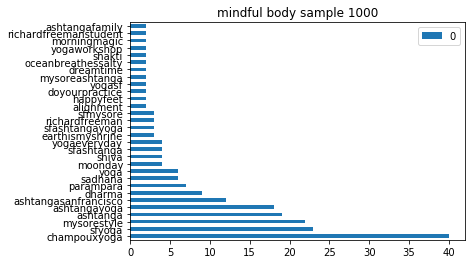

In [56]:
tags = OpenAndCollect('mindfulbodymysore')
df_cp = PandasAndClean(tags)
df_cp.plot(kind='barh', title = "mindful body sample 1000")

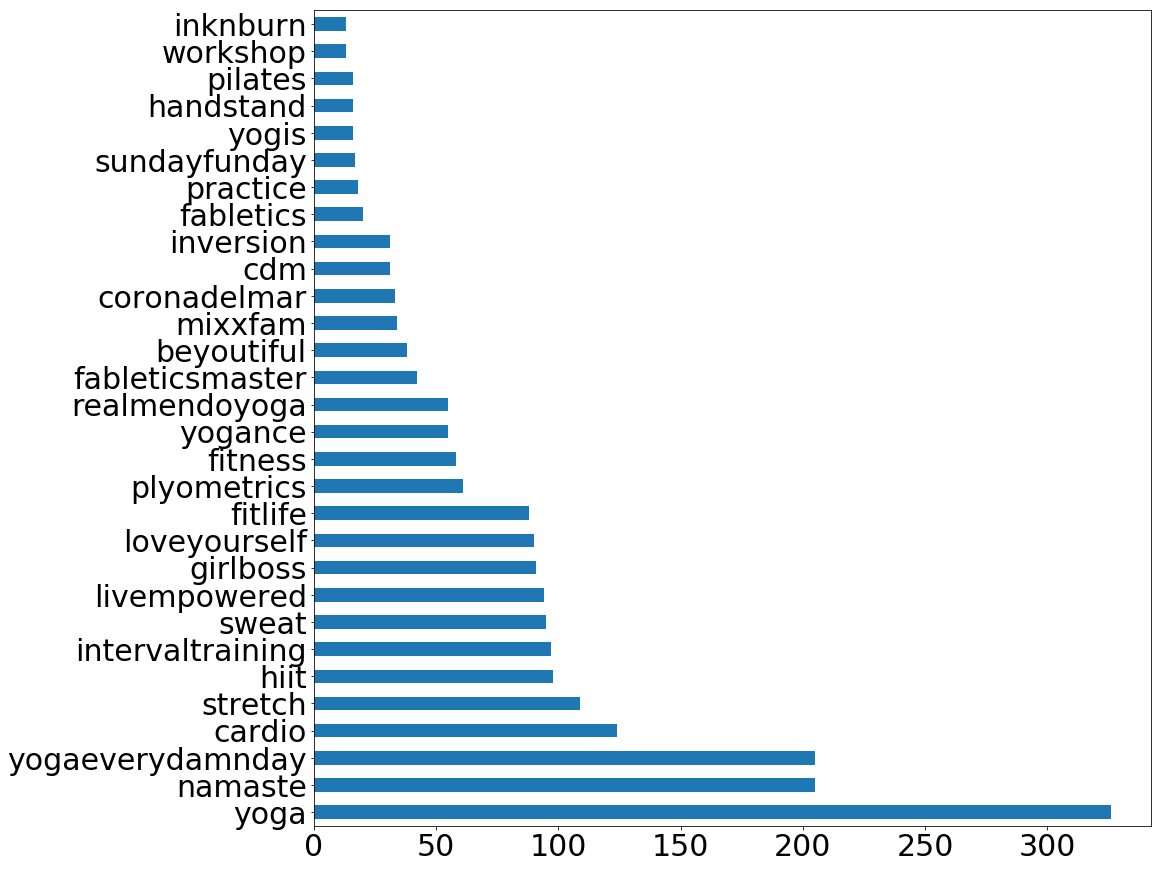

In [8]:
tags = OpenAndCollect('mixxyoga')
df_cp = PandasAndClean(tags)
#fig, ax = plt.subplots(figsize=(10, 1))
df_cp.plot(kind='barh', figsize=(15,15), fontsize=30, legend=False)

/Users/MeghanFrate/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


centeredbodypilates
cfgoldengate
coretotalfitness
momentumcyclingstudio
my3fit
sanchezstreetstudio
studiokickspaloalto
svmma
tandezacademy
transformmv
undergroundfitnessii


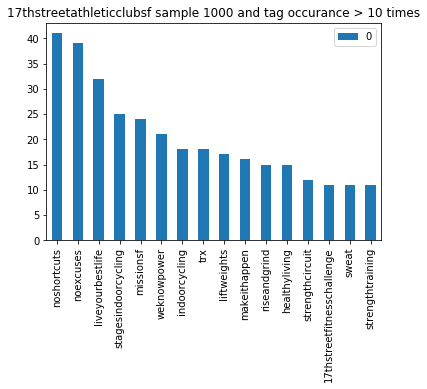

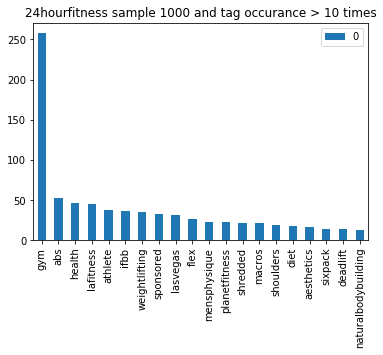

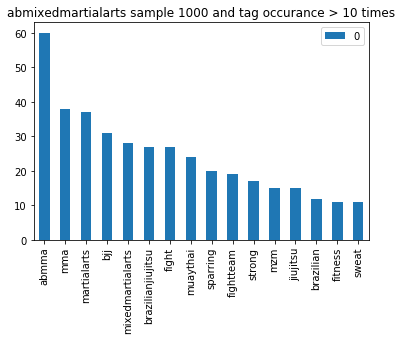

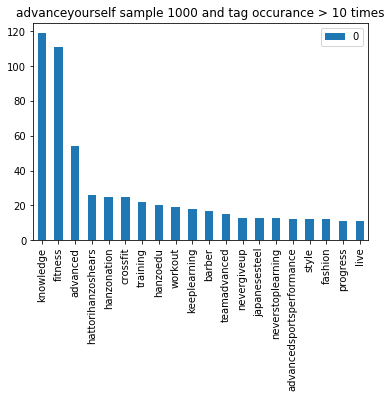

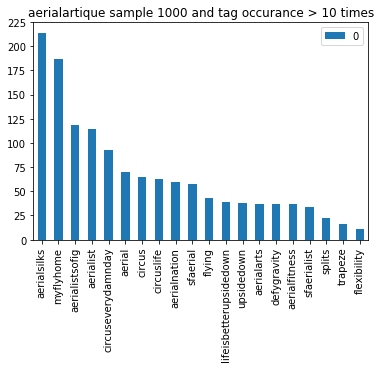

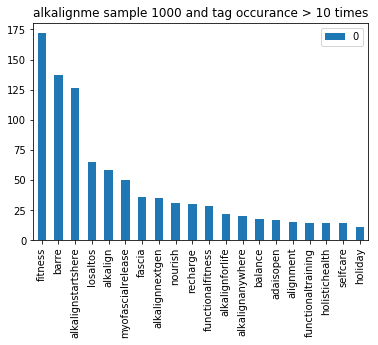

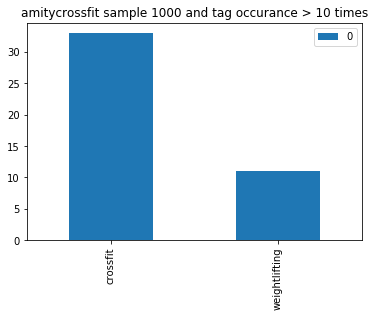

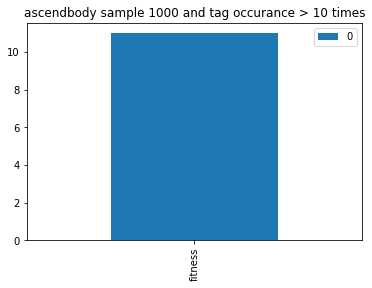

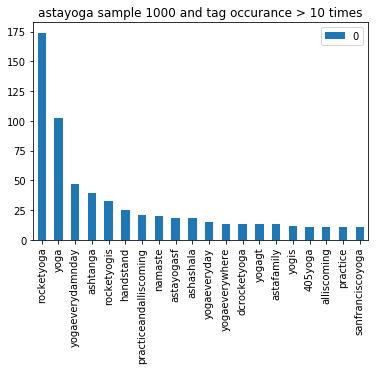

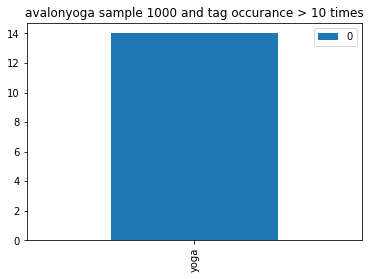

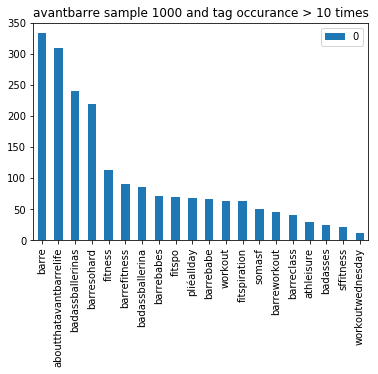

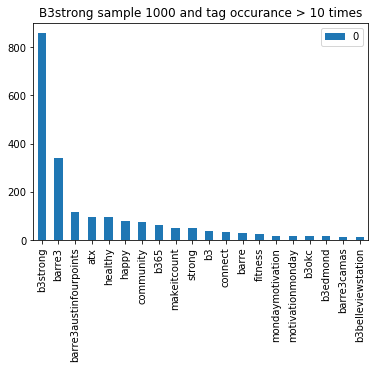

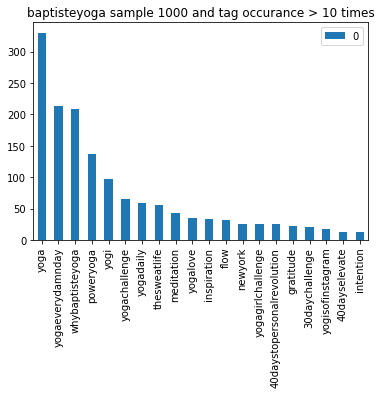

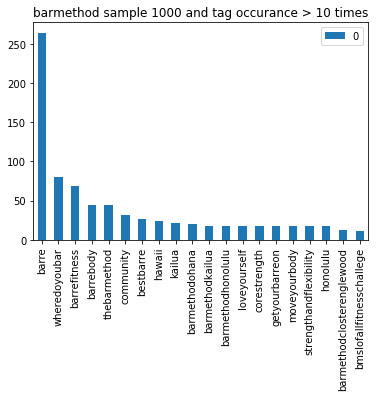

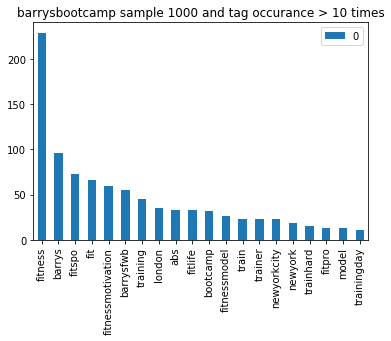

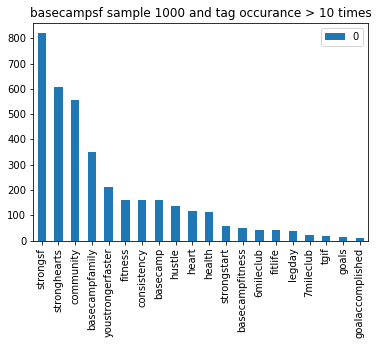

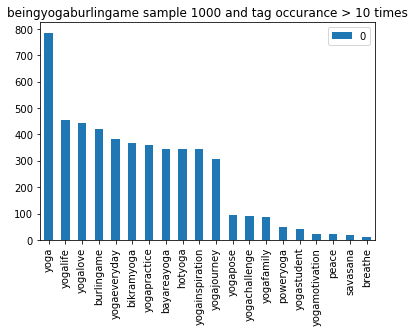

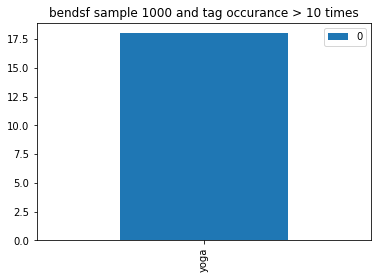

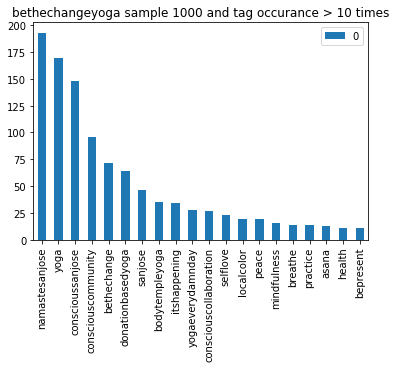

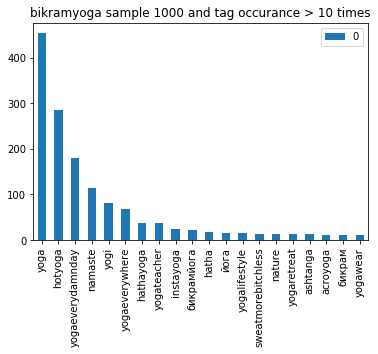

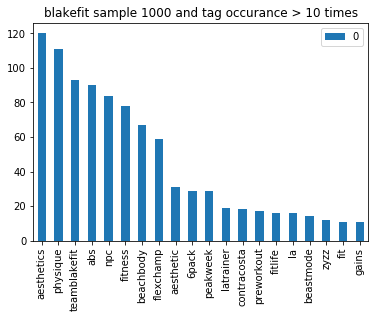

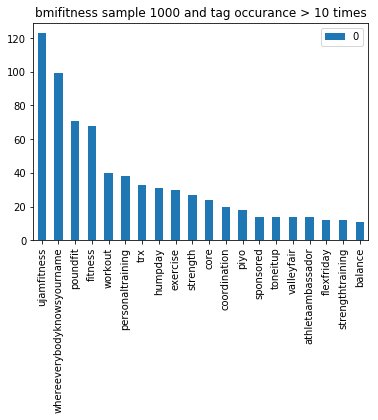

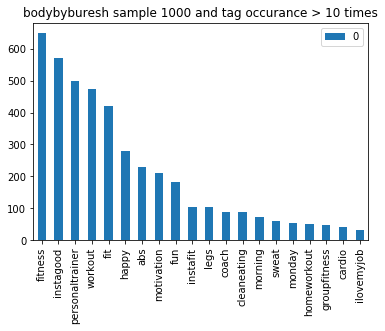

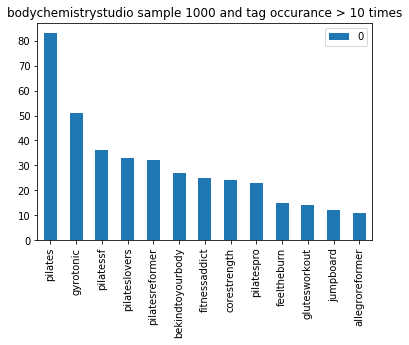

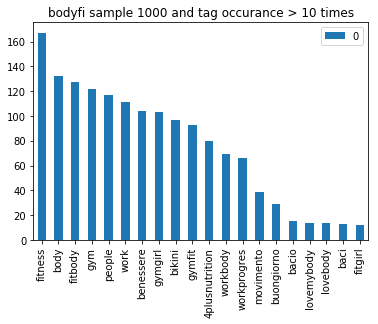

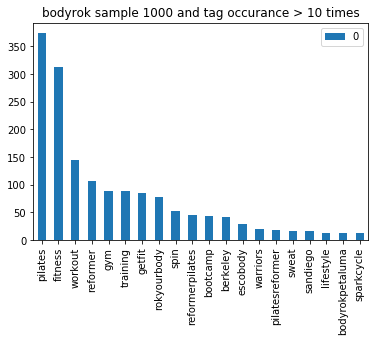

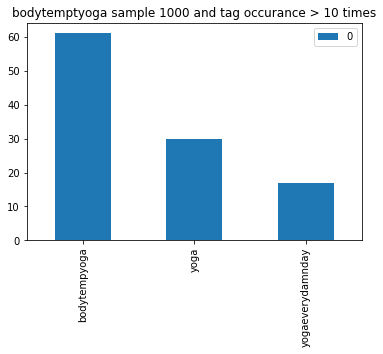

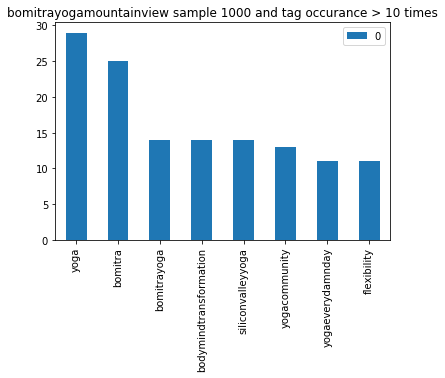

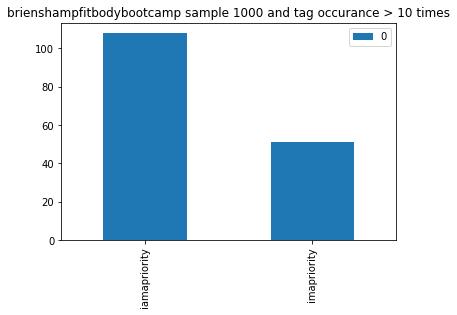

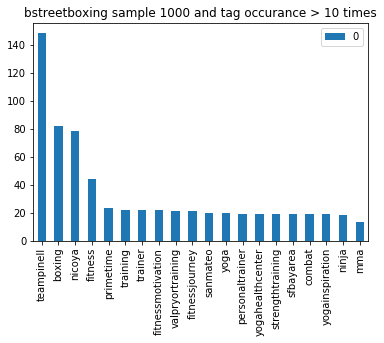

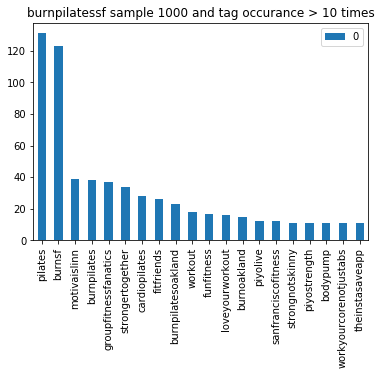

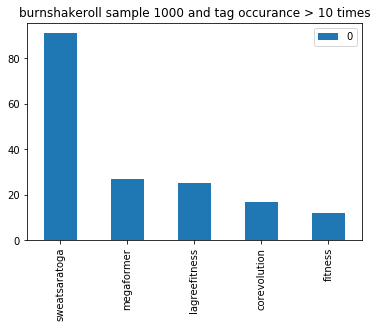

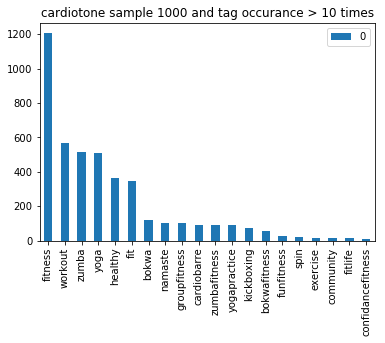

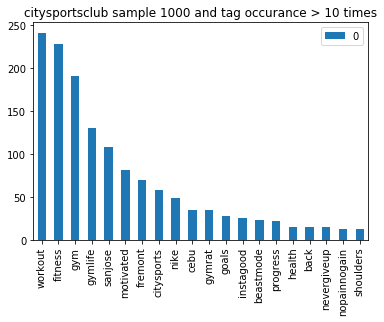

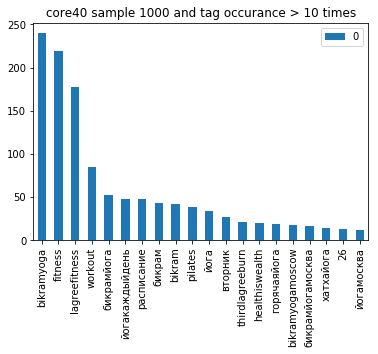

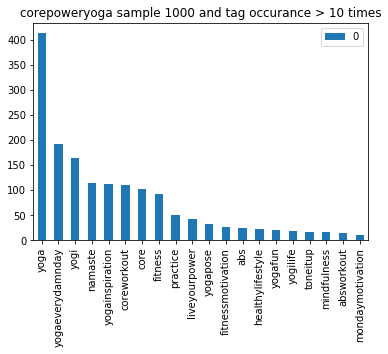

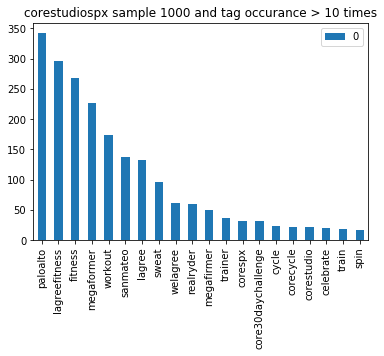

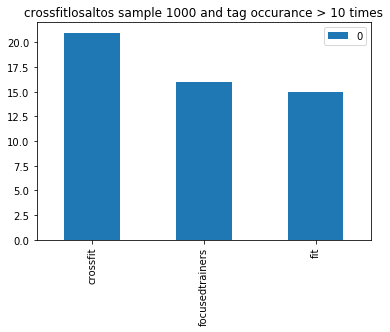

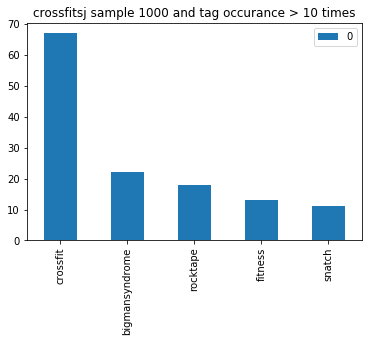

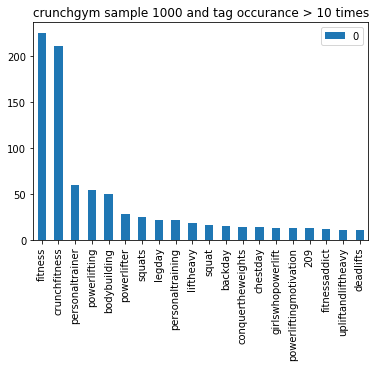

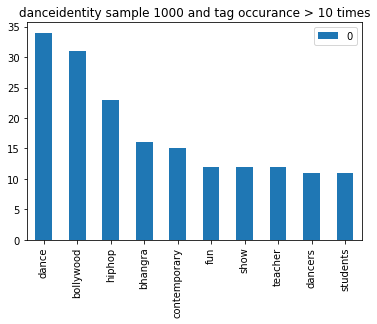

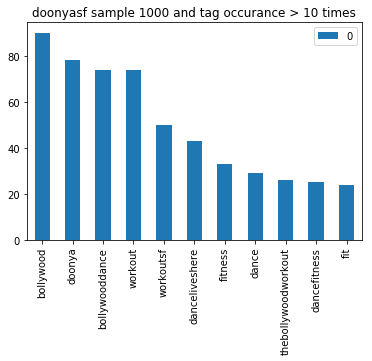

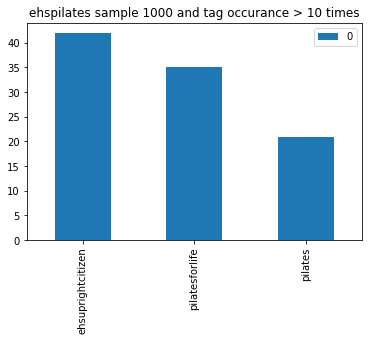

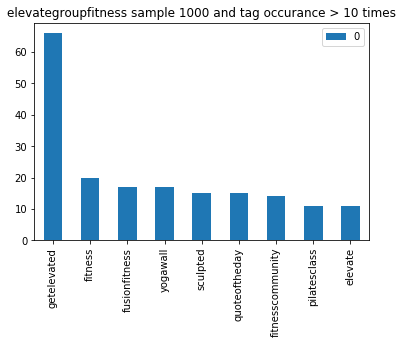

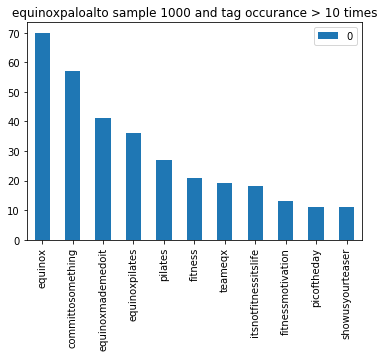

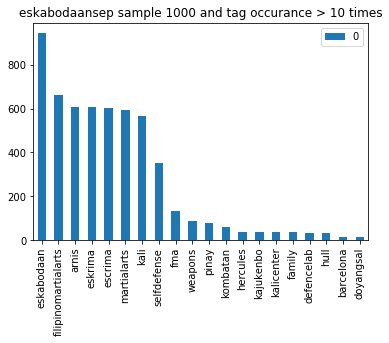

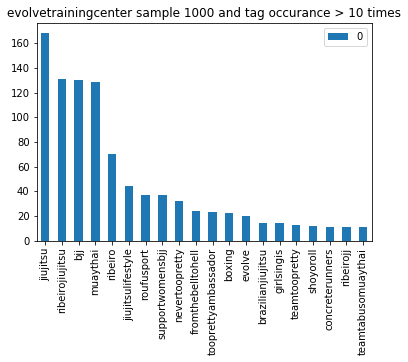

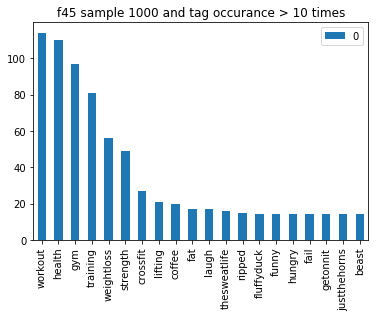

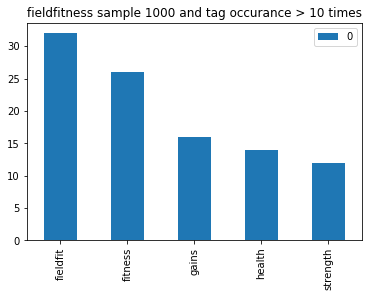

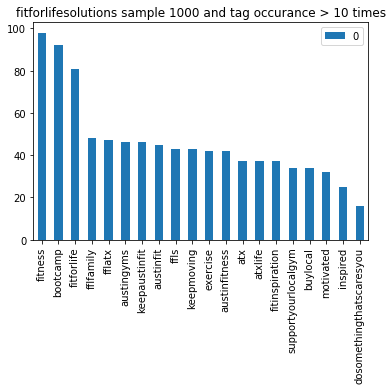

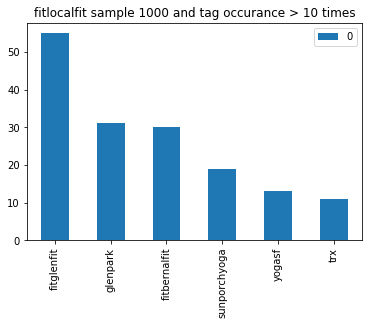

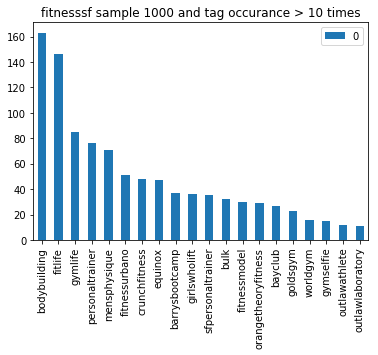

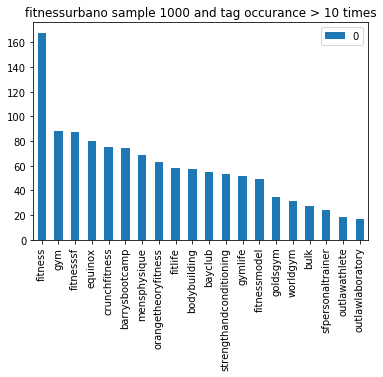

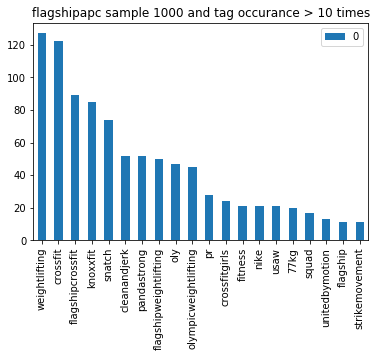

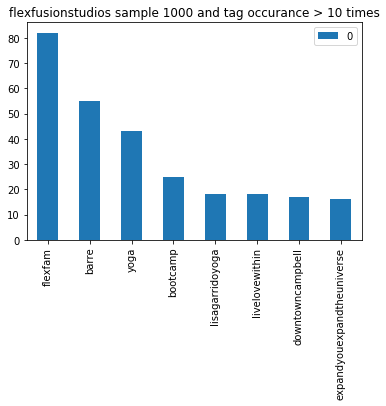

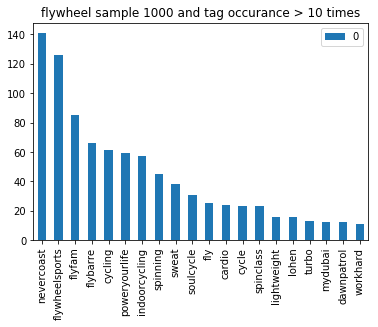

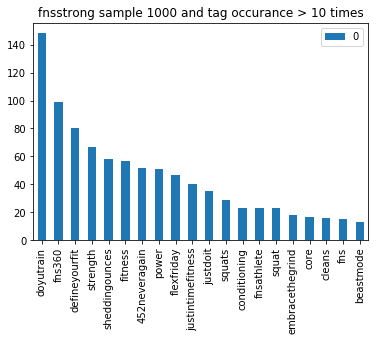

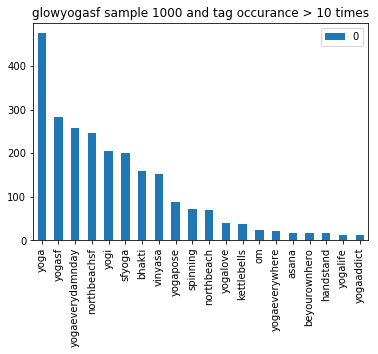

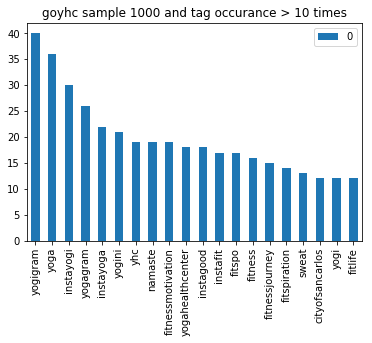

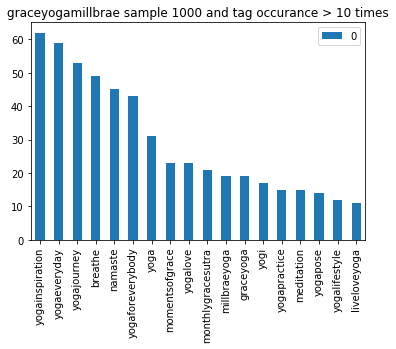

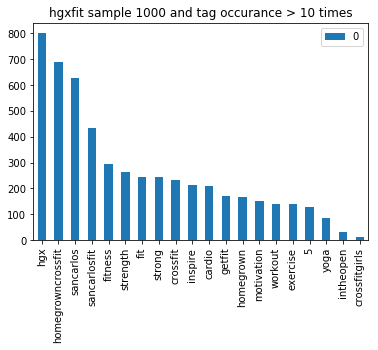

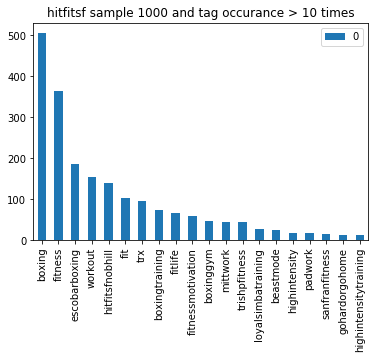

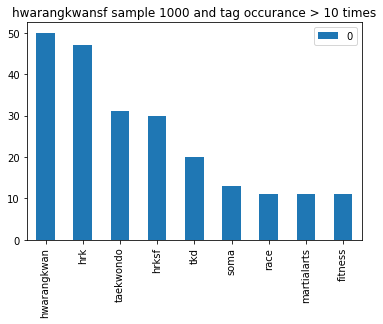

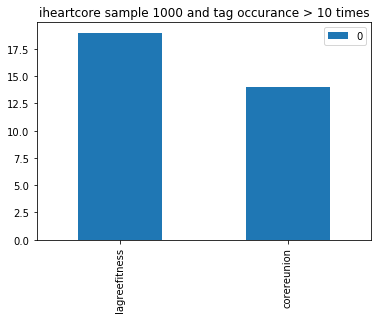

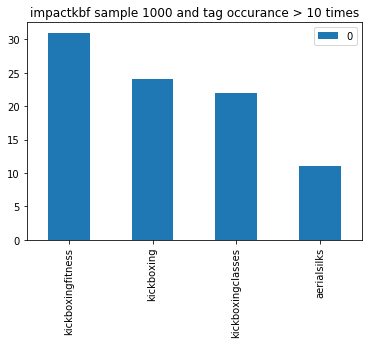

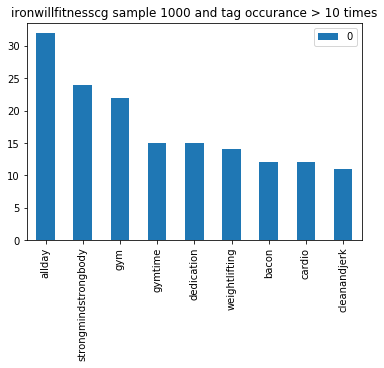

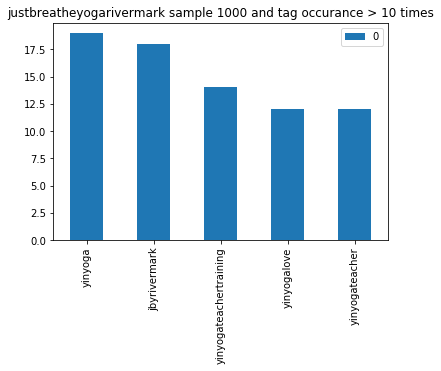

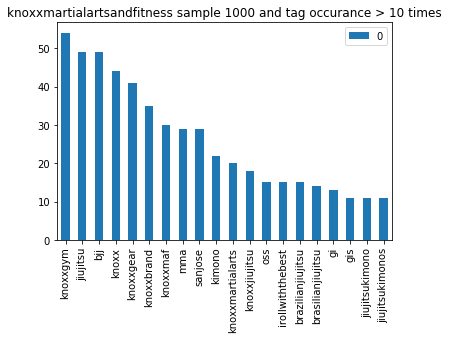

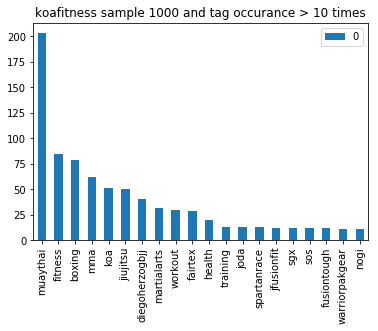

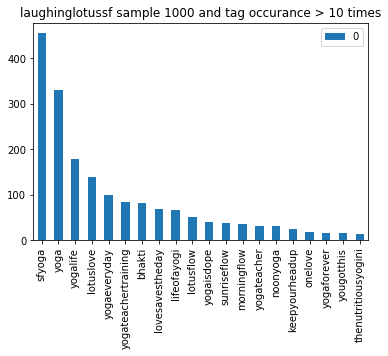

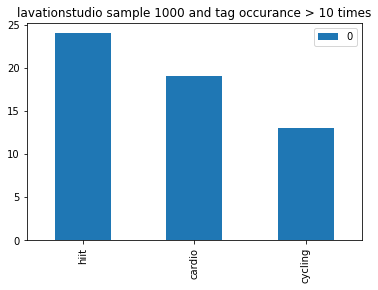

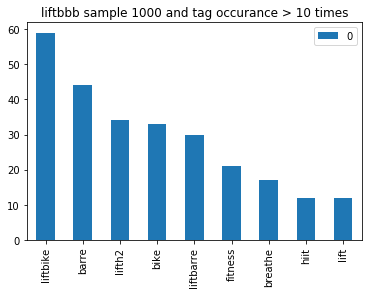

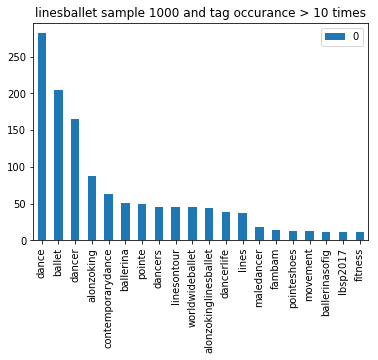

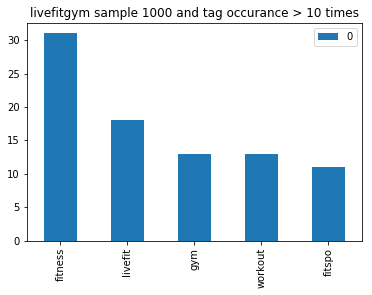

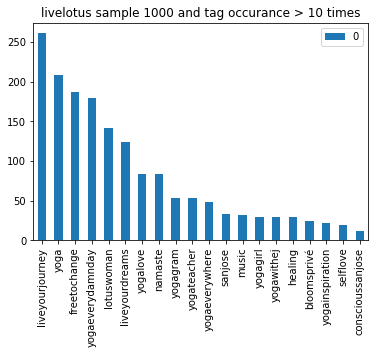

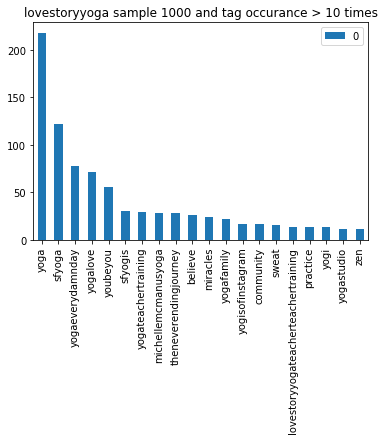

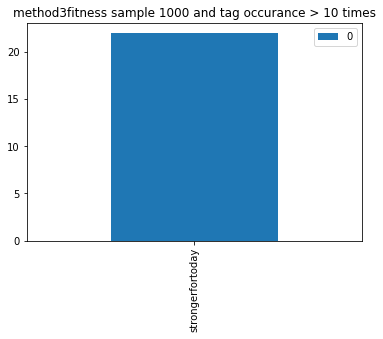

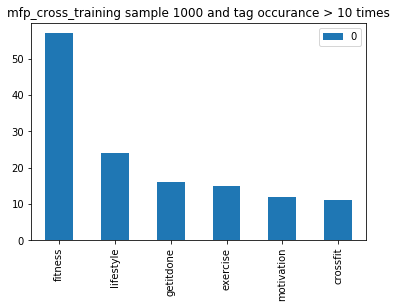

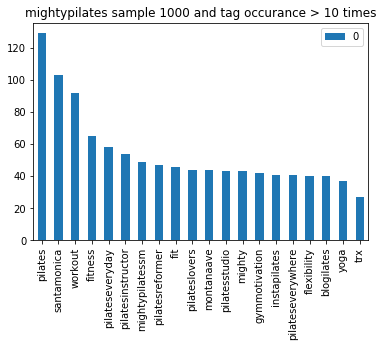

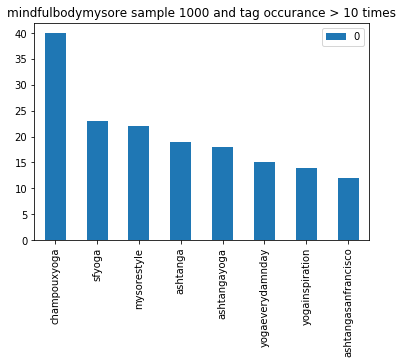

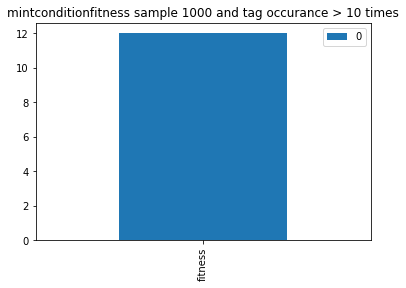

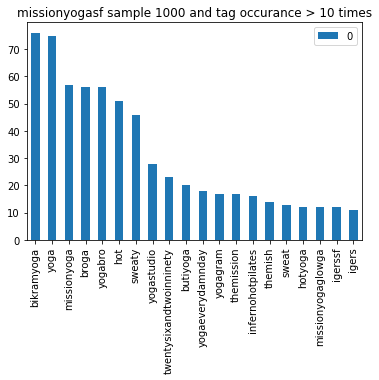

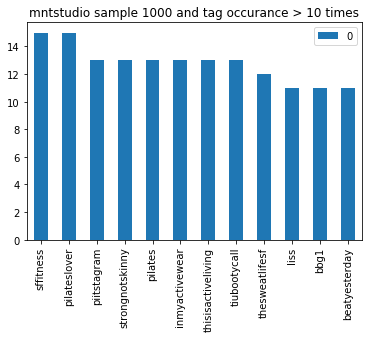

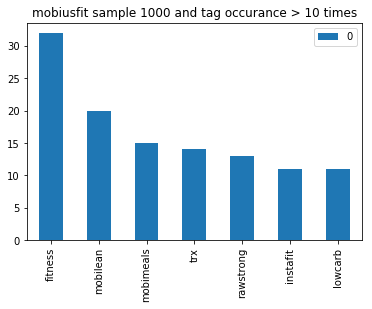

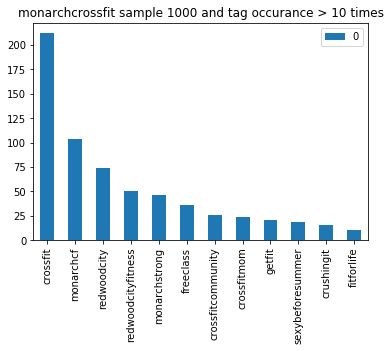

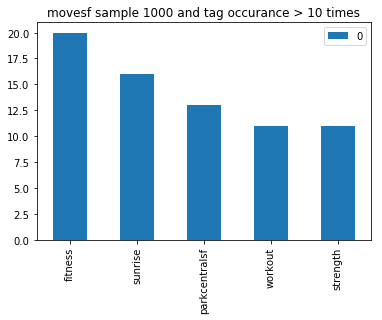

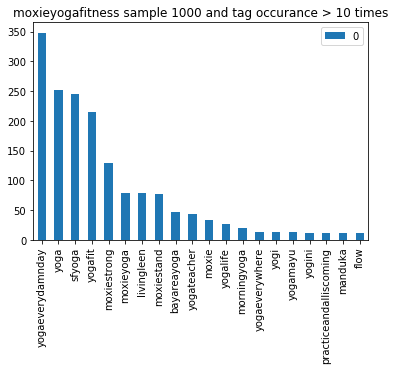

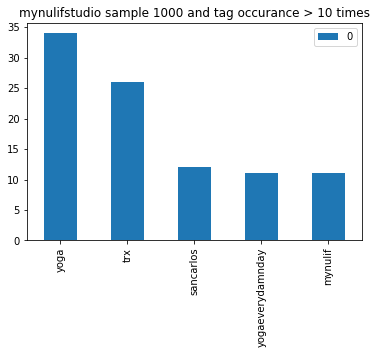

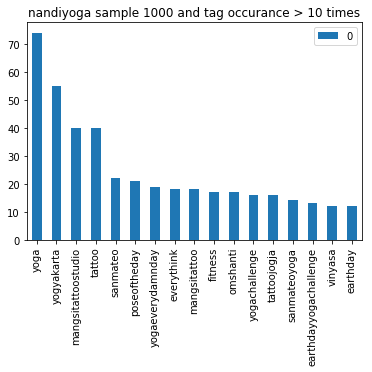

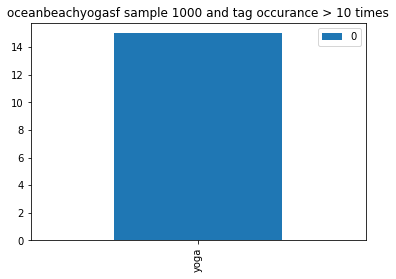

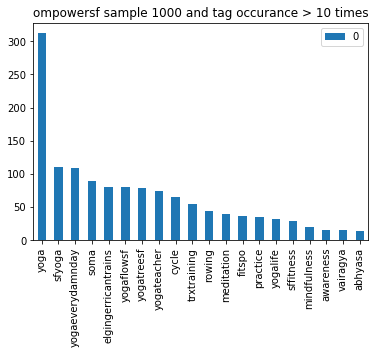

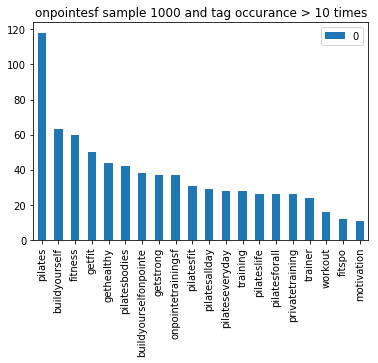

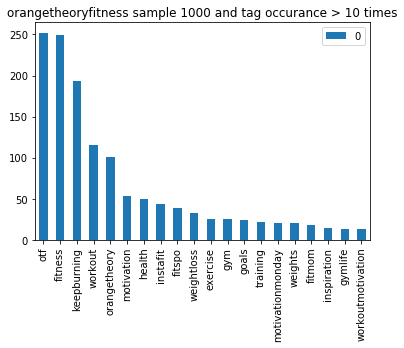

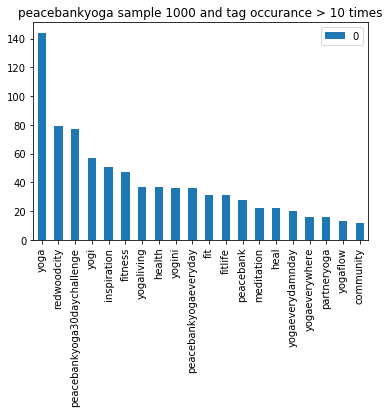

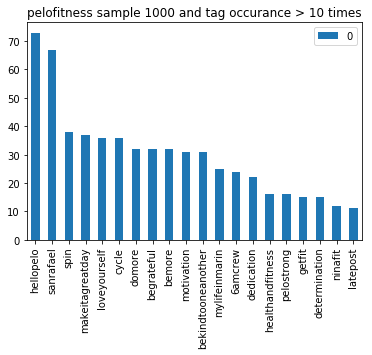

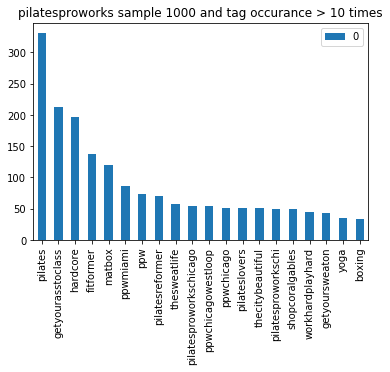

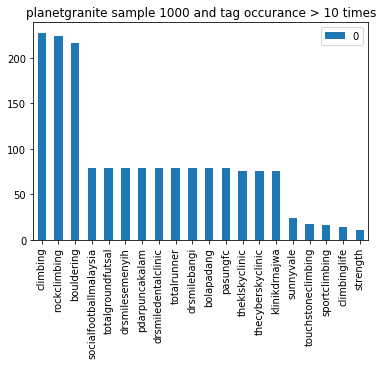

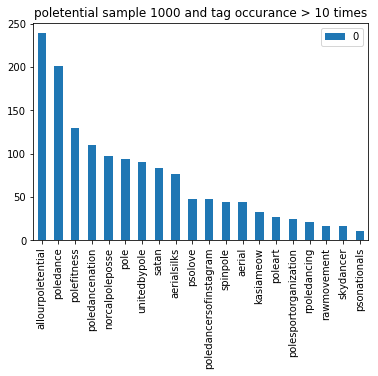

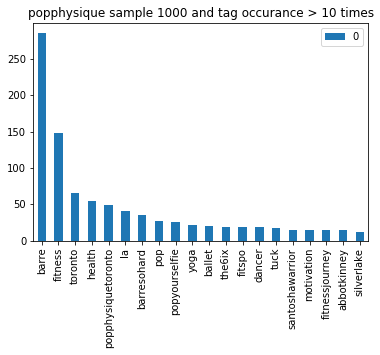

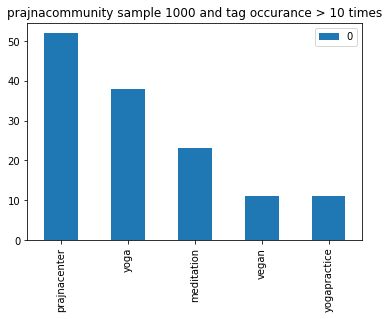

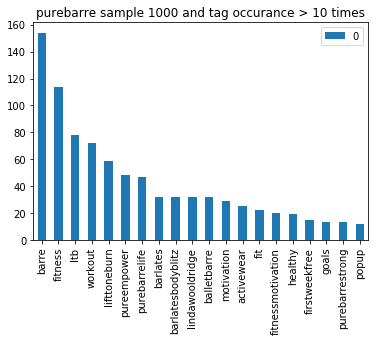

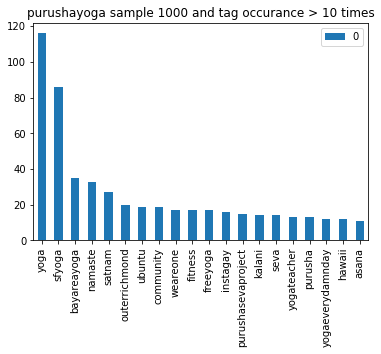

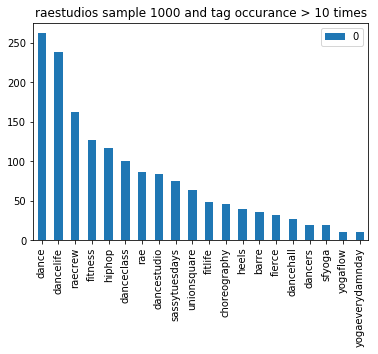

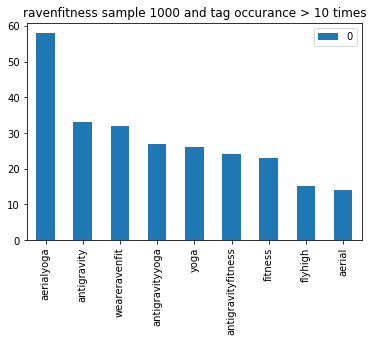

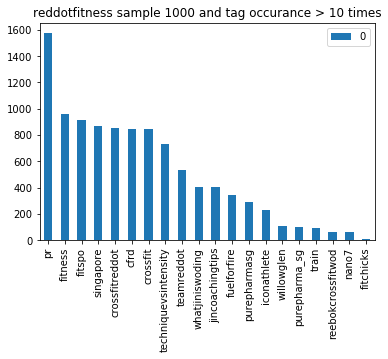

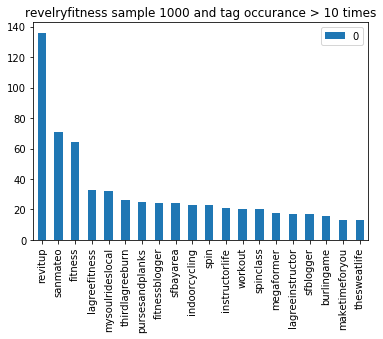

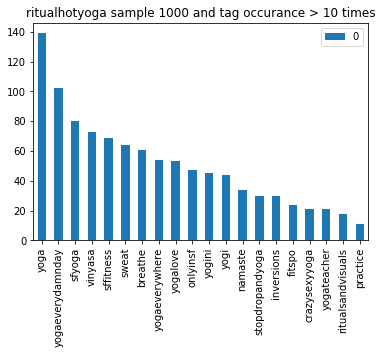

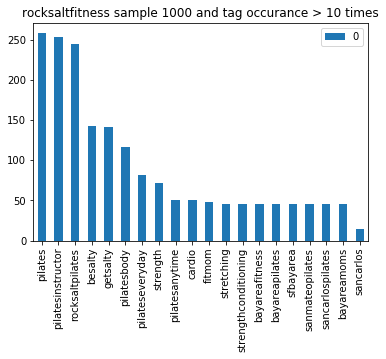

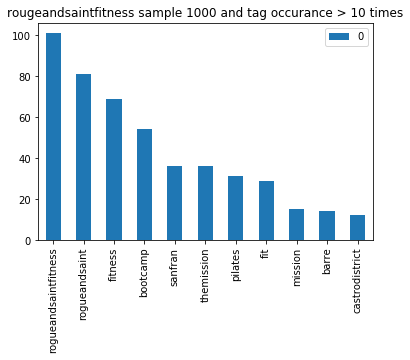

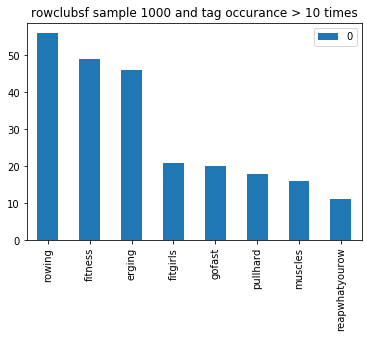

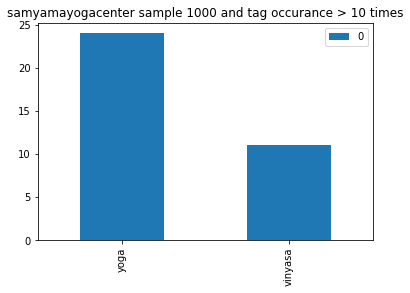

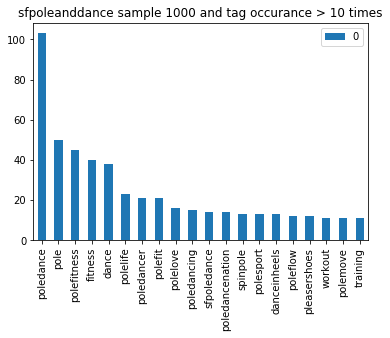

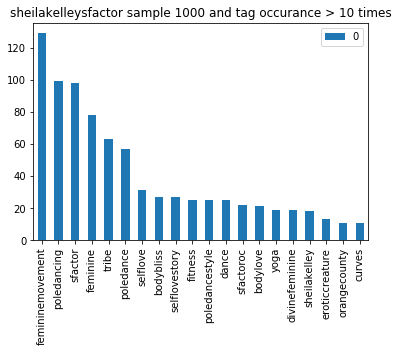

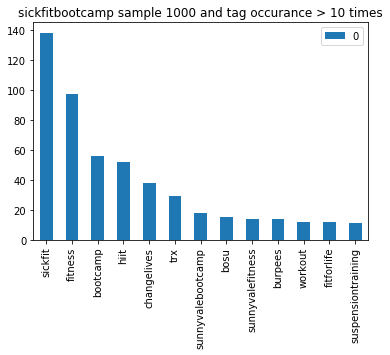

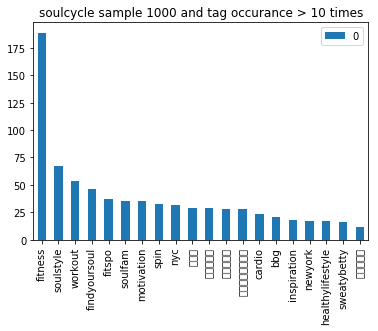

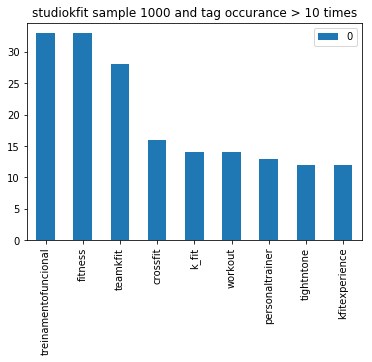

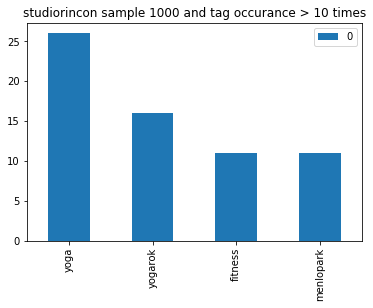

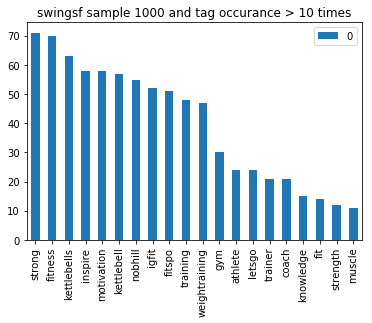

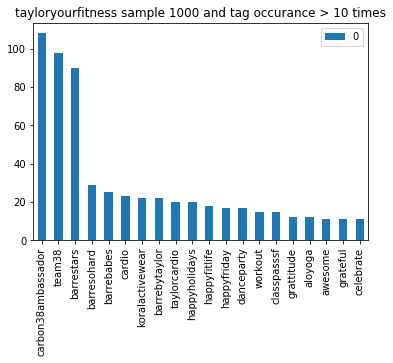

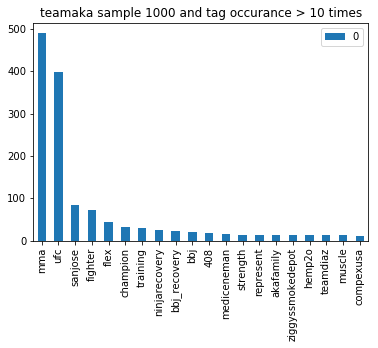

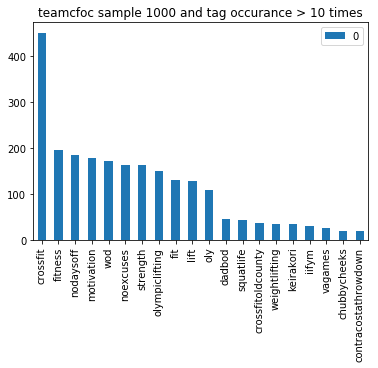

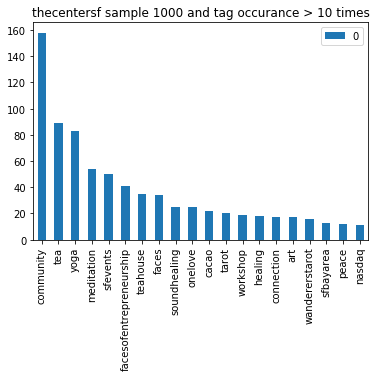

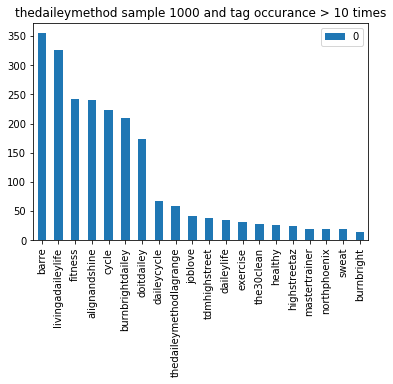

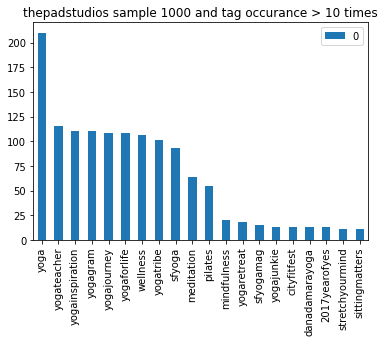

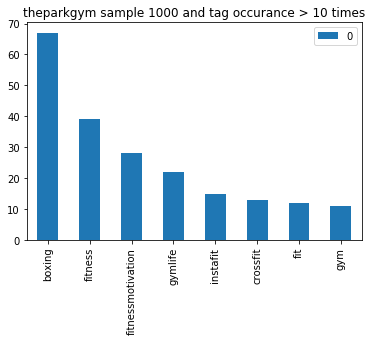

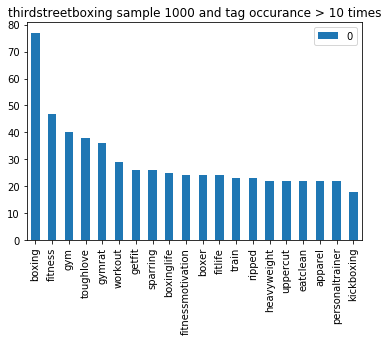

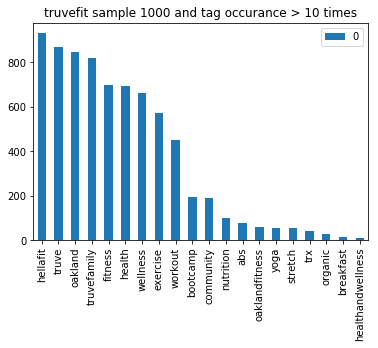

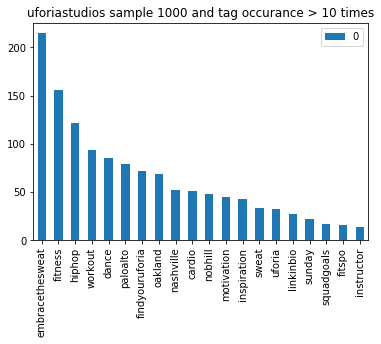

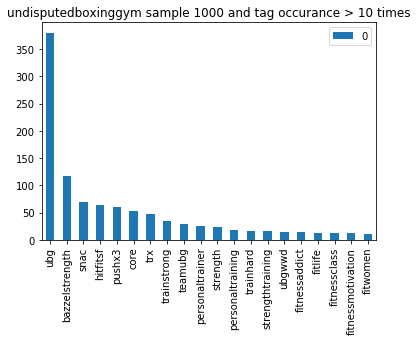

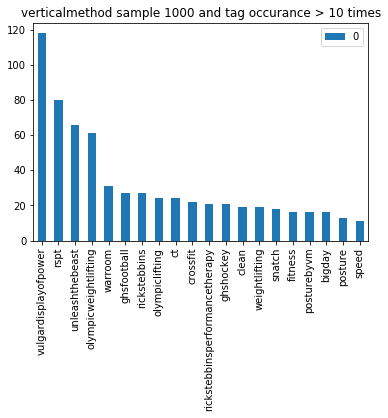

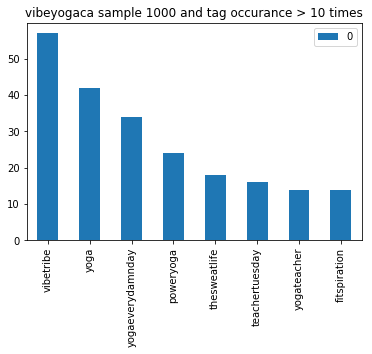

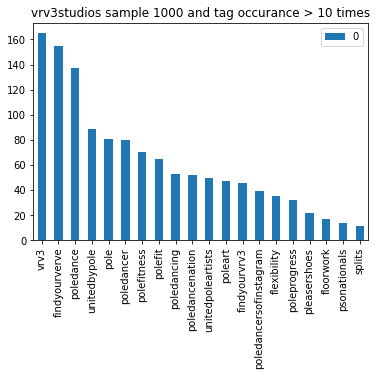

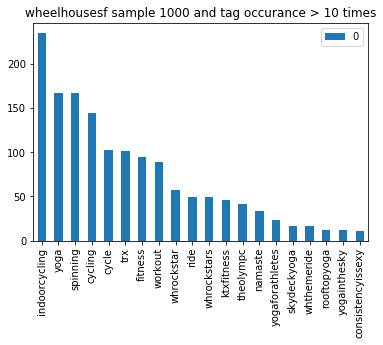

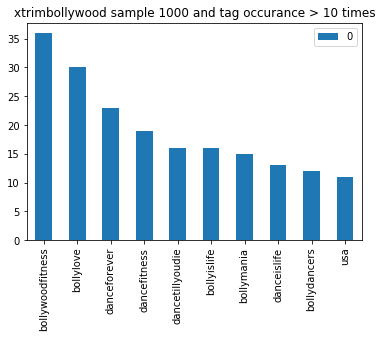

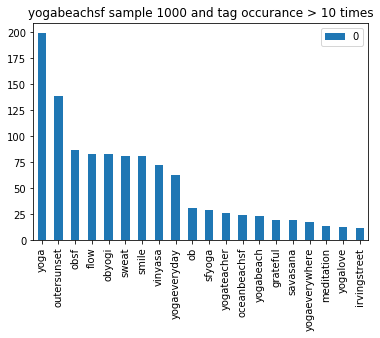

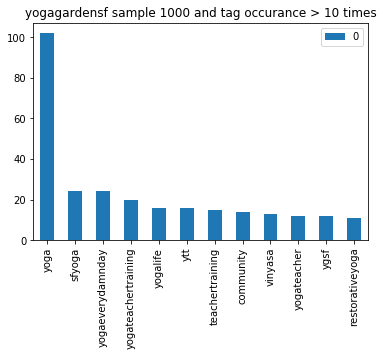

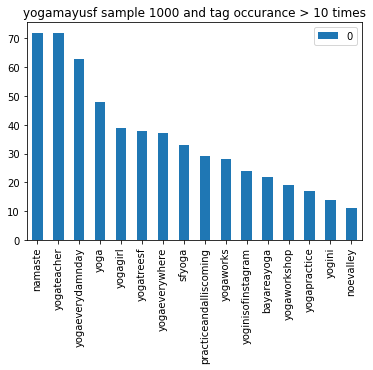

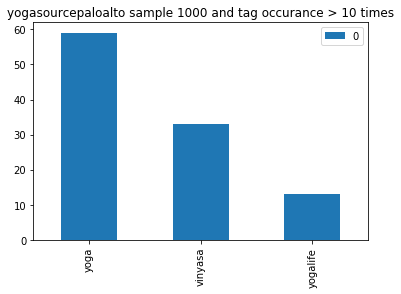

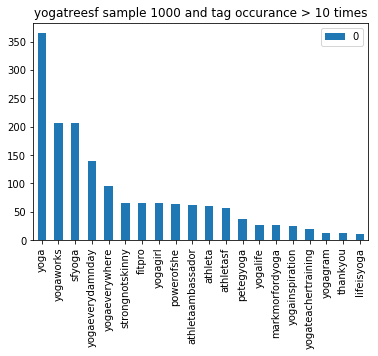

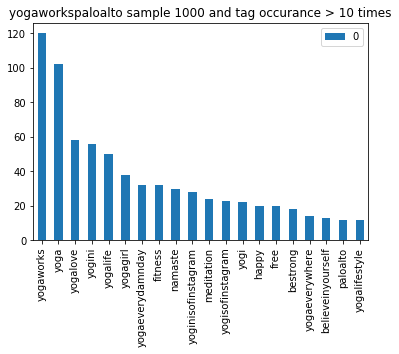

In [49]:
for studioHash in [x for x in os.listdir("SiliconValley2") if os.path.isdir("SiliconValley2/"+x)]:
    tags = OpenAndCollect(studioHash)
    df_cp = PandasAndClean(tags)
    try:
        df_cp.plot(kind='bar', title = studioHash + " sample 1000 and tag occurance > 10 times")
    except:
        print(studioHash)

['yoga', 'yogaeverydamnday', 'namaste', 'cardio', 'stretch', 'hiit', 'intervaltraining', 'sweat', 'livempowered', 'girlboss']
['fitness', 'yogaeverydamnday', 'yogachallenge', 'gym', 'motivation', 'vegan', 'fitspo', 'model', 'bodybuilding', 'practice']
['fitness', 'workout', 'barrys', 'fitnessmotivation', 'fit', 'fitspo', 'nyc', 'abs', 'fitlife', 'fitnessmodel']


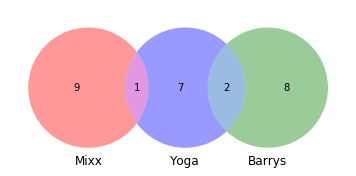

In [98]:
print (df_my.head(10).index.tolist())
print (df_y.head(10).index.tolist())
print (df_bbc.head(10).index.tolist())
venn3([set(df_my.head(10).index.tolist()), set(df_bbc.head(10).index.tolist()), set(df_y.head(10).index.tolist())], ('Mixx', 'Barrys', 'Yoga'))

In [127]:
def WordList():
    textlist = open('wordlist.txt','r')
    words = [t.rstrip() for t in textlist.readlines()]
    return words[:3]
def ParseHashtags(tag, words):
    tag = [tag]
    taglist=[]
    for t in tag:
        print ("t = ", t)
        for w in words:
            taglist.append(t.split(w))
        print ("taglist =", taglist)
    tag = taglist
            
    return tag
    

In [142]:
# Returns a list of common english terms (words)
def initialize_words():
    content = None
    with open('mywordlist.txt') as f: # A file containing common english words
        content = f.readlines()
    return [word.rstrip('\n') for word in content]


def parse_tag(term, wordlist):
    words = []
    # Remove hashtag, split by dash
    word = find_word(term, wordlist) 
    while word != None and len(term) > 0:
        words.append(word)            
        if len(term) == len(word): # Special case for when eating rest of word
            break
        term = term[len(word):]
        word = find_word(term, wordlist)
        print (word)
    return " ".join(words)


def find_word(token, wordlist):
    i = len(token) + 1
    while i > 1:
        i -= 1
        if token[:i] in wordlist:
            return token[:i]
    return None 


wordlist = initialize_words()

In [143]:
#words = WordList()
#split = ParseHashtags('fitfam', words)
#print(split)
print (parse_tag('fitfam', wordlist))

fam
fit fam


In [54]:
df5 = df2.head(100).drop(['corepoweryoga'])
listofhash = list(df5.index)
print (listofhash)
yogacount = 0
fitcount =0
for b in listofhash:
    print (b)
    if 'yoga' in b and 'yoga' != b:
        print ("HAS yoga", b)
        yogacount+=1
        listofhash.remove(b)
        if b in listofhash: print ("AH")
    elif 'fit' in b and 'fitness' != b:
        fitcount +=1
        listofhash.remove(b)
print (yogacount)
print (fitcount)

['liveyourpower', 'cpy', 'yoga', 'cpyjoblove', 'yogaeverydamnday', 'love', 'health', 'cpyinstayogi', 'headstand', 'upsidedown', 'inversion', 'yogini', 'yogi', 'igyoga', 'yogalove', 'yogalife', 'yogachallenge', 'yogagirl', 'instayoga', 'handstand', 'yogainspiration', 'corepower', 'summerwarrior', 'fitness', 'fitnessmotivation', 'coreworkout', 'yogisofinstagram', 'breathe', 'namaste', 'MasteringHandstands', 'practiceandalliscoming', 'yogafit', 'yogajourney', 'ashtangayoga', 'yogaflow', 'yogamagic', 'yogastrong', 'yogafun', 'yogaeveryday', 'yogapractice', 'instayogi', 'igyogafamily', 'newengland', 'bostonyoga', 'vinyasa', 'asana', 'cpyboston', 'getsweaty', 'eastcoast', 'hotyoga', 'poweryoga', 'core', 'abs', 'instagood', 'picoftheday', 'sculpt', 'yogasculpt', 'yogateacher', 'strength', 'flow', 'handstands', 'lululemon', 'whyiyoga', 'atxyoga', 'yogagram', 'yogaeverywhere', 'myyogalife', 'yogatime', 'armbalance', 'strengthtraining', 'myhappyplace', 'practice', 'yogamen', 'yogadudes', 'fitfam

In [48]:
print (listofhash)

['liveyourpower', 'cpy', 'yoga', 'cpyjoblove', 'love', 'health', 'cpyinstayogi', 'headstand', 'upsidedown', 'inversion', 'yogini', 'yogi', 'yogalove', 'yogachallenge', 'instayoga', 'handstand', 'corepower', 'summerwarrior', 'fitness', 'coreworkout', 'yogisofinstagram', 'breathe', 'namaste', 'MasteringHandstands', 'practiceandalliscoming', 'yogajourney', 'yogaflow', 'yogastrong', 'yogaeveryday', 'instayogi', 'newengland', 'vinyasa', 'asana', 'cpyboston', 'getsweaty', 'eastcoast', 'poweryoga', 'core', 'abs', 'instagood', 'picoftheday', 'sculpt', 'yogateacher', 'strength', 'flow', 'handstands', 'lululemon', 'atxyoga', 'yogaeverywhere', 'yogatime', 'armbalance', 'strengthtraining', 'myhappyplace', 'practice', 'yogadudes', 'functionality', 'onthematt', 'menwithhealth', 'workout', 'guysdoyoga', 'happy', 'loveyourself', 'absworkout', 'motivation', 'pilatesbrasil', 'pilateslovers', 'pilates', 'pilatesparatodos', 'contrologia', 'josephpilates', 'flexibilidade', 'equilibrio', 'coordenaçâo', 'alo

In [45]:
yogasum=0
fitsum=0
for b in listofhash:
    if 'yoga' in b:
        print (b)
        yogasum+=df5.loc[b][0]
        if 'yoga' != b:
            df5 = df5.drop([b])
    elif 'fit' in b:
        fitsum+=df5.loc[b][0]
        if 'fitness' != b:
            df5 = df5.drop([b])

yoga
yogalove
yogachallenge
instayoga
yogajourney
yogaflow
yogastrong
yogaeveryday
poweryoga
yogateacher
atxyoga
yogaeverywhere
yogatime
yogadudes
guysdoyoga


In [38]:
df5[0]['yoga']=yogasum
df5[0]['fit']=fitsum

In [39]:
print (yogacount)
print (fitcount)
print (df5)

21
2
                             0
liveyourpower             45.0
cpy                       76.0
yoga                    1037.0
cpyjoblove                27.0
yogaeverydamnday         226.0
love                      51.0
health                    27.0
cpyinstayogi              34.0
headstand                 23.0
upsidedown                24.0
inversion                 14.0
yogini                    61.0
yogi                     140.0
igyoga                    54.0
yogalife                 116.0
yogagirl                  41.0
handstand                 28.0
yogainspiration          110.0
corepower                 63.0
summerwarrior             14.0
fitness                  114.0
fitnessmotivation         22.0
coreworkout               72.0
yogisofinstagram          69.0
breathe                   21.0
namaste                  130.0
MasteringHandstands       12.0
practiceandalliscoming    15.0
yogafit                   30.0
ashtangayoga              13.0
...                        ...
myy

In [ ]:
venn3([df3.head(5), s, set3], ('Set1', 'Set2', 'Set3'))